Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", remove any ```raise NotImplementedError()``` and enter your student ID below:

In [1]:
STUDENT_ID = "200774408"

---

# MTH793P - Coursework 6

This is a template notebook for the computational exercises of [Coursework 6](https://qmplus.qmul.ac.uk/pluginfile.php/2462232/mod_resource/content/1/coursework06.pdf) of the module MTH793P, Advanced machine learning. Closely follow the instructions in this template in order to complete the assessment and to obtain full marks. For the submitted notebook, please only modify cells where you are instructed to do so. Failure to comply may result in unexpected errors that can lead to mark deductions.

Author: [Martin Benning](mailto:m.benning@qmul.ac.uk)

Date: 05.02.2021

As usual, we begin by loading the necessary libraries.

In [2]:
%matplotlib inline
import numpy as np
from skimage.data import astronaut
from skimage import io as io1
from scipy import io as io2
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [3]:
import scipy

## Singular value decomposition

First, we load the image of Eileen Collins and store it in a variable named *image*.

In [4]:
image = astronaut()

We visualise the image with the following cell.

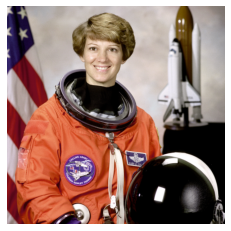

In [5]:
plt.imshow(image)
plt.axis('off') ;

Next, we store *image* as a matrix *matrix* of size $512 \times 1536$.

In [6]:
matrix = image.reshape(512, -1)
s, n = matrix.shape
print(f"{s=} || {n=}")

s=512 || n=1536


Next, we compute the singular decomposition $\text{matrix} = U\Sigma V^\top$ of *matrix* and store the left singular vectors in the array *U*, the transpose of the right singular vectors in *V_transpose* and the singular values in *singular_values*...

In [7]:
# YOUR CODE HERE
U, singular_values, V_transpose = np.linalg.svd(matrix)

In [8]:
matrix.shape

(512, 1536)

...and visualise the singular values (without and with logarithmic scaling).

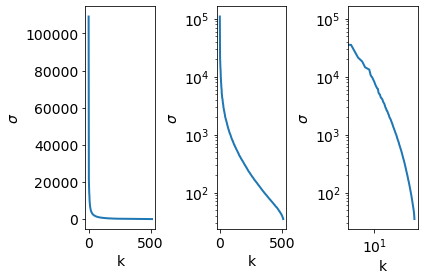

In [9]:
plt.subplot(1, 3, 1)
plt.plot(singular_values, linewidth=2)
plt.xlabel('k', fontsize=14)
plt.ylabel('$\sigma$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.subplot(1, 3, 2)
plt.semilogy(singular_values, linewidth=2)
plt.xlabel('k', fontsize=14)
plt.ylabel('$\sigma$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.subplot(1, 3, 3)
plt.plot(singular_values, linewidth=2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k', fontsize=14)
plt.ylabel('$\sigma$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('singular-values.pdf')

Subsequently, we set all singular values after the index *index* to zero and print the ratio of the Frobenius norms of the approximation and the original matrix. The closer this ratio is to one, the better the approximation. Please experiment with different choices of *index*.

In [10]:
# YOUR CODE HERE
index = 10
σk = singular_values.copy()
σk[index:] = 0
Σk = np.c_[np.diag(σk), np.zeros((s, n - s))]

norm_approx = np.linalg.norm(U @ Σk @ V_transpose)
norm_data = np.linalg.norm(matrix)
ratio = norm_approx / norm_data

print(f'Ratio of Frobenius norms for low-rank approximation and original matrix: {ratio:.4f}')

Ratio of Frobenius norms for low-rank approximation and original matrix: 0.9770


We visualise the cumulative sum of the singular values with the following cell.

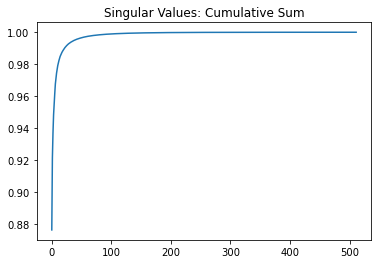

In [11]:
plt.plot(np.sqrt(np.cumsum(singular_values ** 2)/np.sum(singular_values ** 2)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

We write a function **svd_thresholding** that takes an array *input_matrix* and a natural number *rank* as its input arguments and return the optimal approximation of *input_matrix* of rank *rank* in the sense of the Frobenius norm.

In [12]:
def svd_thresholding(input_matrix, rank):
    s, n = input_matrix.shape
    U, singular_values, V_transpose = np.linalg.svd(input_matrix)
    σk = singular_values.copy()
    σk[rank:] = 0
    if n > s:
        dims = (s, n - s)
        Σk = np.c_[np.diag(σk), np.zeros(dims)]
    else:
        dims = (s - n, n)
        Σk = np.r_[np.diag(σk), np.zeros(dims)]
    
    Xk = U @ Σk @ V_transpose
    return Xk

def svd_thresholding(input_matrix, rank):
    s, n = input_matrix.shape
    U, singular_values, V_transpose = scipy.linalg.svd(input_matrix, full_matrices=False)
    σk = singular_values.copy()
    σk[rank:] = 0
    
    Xk = np.einsum("ik,k,kj->ij", U, σk, V_transpose, optimize=True)
    return Xk

Test your function *svd_thresholding* by applying it to the matrix *matrix* for different choices of *rank*, store at least one approximation in a variable named *matrix_approximation*, convert it to an image named *image_approximation* and visualise this image with suitable tools from the Matplotlib library.

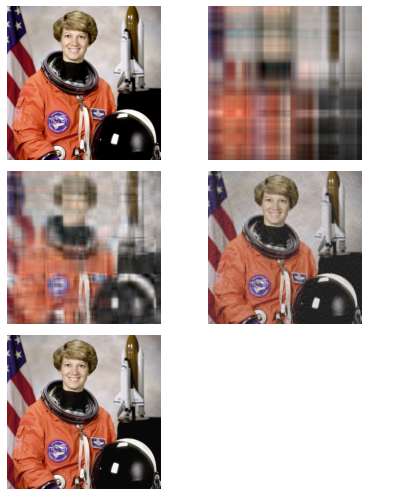

In [13]:
k_list = [-1, 3, 10, 50, 256]

fig, ax = plt.subplots(3, 2, figsize=(6, 7))
ax = ax.ravel()
for axi, k in zip(ax, k_list):
    matrix_approximation = svd_thresholding(matrix, k)
    image_approximation = matrix_approximation.reshape(s, s, -1)
    imin, imax = image_approximation.min(), image_approximation.max()
    img_norm = (image_approximation - imin) / (imax - imin)
    axi.imshow(img_norm)
    axi.axis("off")
    
plt.axis("off")
plt.tight_layout()

The following cells -- one visible, the other one hidden -- test your function with specific examples that worth one mark each, or **2/10 marks** in total.

In [14]:
from numpy.testing import assert_array_almost_equal
assert_array_almost_equal(svd_thresholding(np.array([[3, 2, 2], [2, 3, -2]]), 1), np.array([[2.5, 2.5, 0], \
                                                                                         [2.5, 2.5, 0]]))

If you want to, you can save the images *image* and *image_approximations* to your hardrives with the following commands.

In [15]:
io1.imsave('svd-example-k-' + str(index) + '.png', np.rint(image_approximation).clip(0, 255).astype(np.uint8))
io1.imsave('astronaut.png', image)

We write two functions **standardise** and **de_standardise**. The first function should standardise the columns of the input argument *matrix* and return the standardised version together with the column-means and the column-standard-deviations. The second function inverts the operations of the first function. It takes arguments *matrix*, *means* and *stds* and multiplies *matrix* with the column-standard-deviations *stds* and adds back the column-means *means*.

In [16]:
def standardise(matrix):
    # YOUR CODE HERE
    μ, σ = matrix.mean(axis=0), matrix.std(axis=0)
    matrix_std = (matrix - μ) / σ
    return matrix_std, μ, σ

def de_standardise(matrix, means, stds):
    return matrix * stds + means

We test both functions with four tests -- two visible, three hidden -- that are worth one mark each, or **5/10 marks** in total.

In [17]:
test_matrix = np.array([[5, 4, 1], [5, 5, 0], [0, 0, 5], [1, 0, 4]]).astype('float64')
std_matrix, means, stds = standardise(test_matrix)
assert_array_almost_equal(means, np.array([2.75, 2.25, 2.5]))

In [18]:
assert_array_almost_equal(stds, np.array([2.27760839, 2.27760839, 2.06155281]))

We repeat our previous experiment of computing the singular value decomposition, but standardise the matrix *matrix* first and store it in a variable named *matrix_standardised*. Store the corresponding singular values in a variable named *std_singular_values*.

In [19]:
matrix_standardised, means, stds = standardise(matrix)

As before, we visualise the decay of the singular values. 

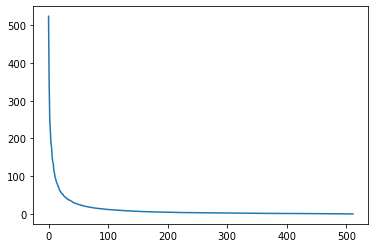

In [20]:
_, singular_values_std, _ = np.linalg.svd(matrix_standardised)
plt.plot(singular_values_std)

The behaviour is similar as before, but the range of the singular values has changed. We visualise the cumulative sum of the singular values and compare the cumulative sum with the non-standardised version.

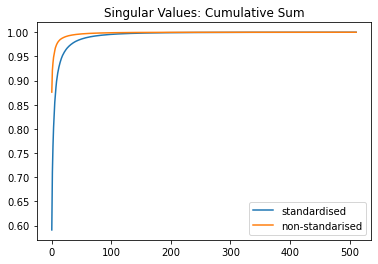

In [21]:
plt.plot(np.sqrt(np.cumsum(singular_values_std ** 2)/np.sum(singular_values_std ** 2)), label="standardised")
plt.plot(np.sqrt(np.cumsum(singular_values ** 2)/np.sum(singular_values ** 2)), label="non-standarised")
plt.title('Singular Values: Cumulative Sum')
plt.legend()
plt.show()

Approximate the standardised matrix *matrix_standardised* with the optimal approximation of rank *rank* in the sense of the Frobenius norm and visualise your result. *Hint*: use the function *de_standardise* for this task.

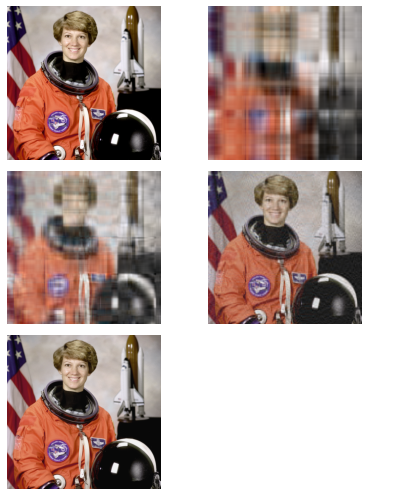

In [22]:
k_list = [-1, 3, 10, 50, 256]

fig, ax = plt.subplots(3, 2, figsize=(6, 7))
ax = ax.ravel()
for axi, k in zip(ax, k_list):
    matrix_approximation = svd_thresholding(matrix_standardised, k)
    matrix_approximation = de_standardise(matrix_approximation, means, stds)
    image_approximation = matrix_approximation.reshape(s, s, -1)
    imin, imax = image_approximation.min(), image_approximation.max()
    img_norm = (image_approximation - imin) / (imax - imin)
    axi.imshow(img_norm)
    axi.axis("off")
    
plt.axis("off")
plt.tight_layout()

## Eigenfaces

In the next part of this coursework, we work with a dataset consisting of numerous faces and create a basis of so-called eigenfaces. First, we update the sizes and fontsizes of the figures in this notebook. 

In [23]:
plt.rcParams['figure.figsize'] = [9, 9]
plt.rcParams.update({'font.size': 16})

Now we load the Yale faces B mat-file *yale-b-faces.mat* with the help of scipy and store the data into the matrix *all_faces*. The dataset contains 2410 images of size $192 \times 168$ of 38 different people. The number of images per person is stored in the vector *number_of_faces_per_person*.

In [24]:
mat_file_import = io2.loadmat('yale-b-faces.mat')
all_faces = mat_file_import['faces']
number_of_faces_per_person = mat_file_import['nfaces'].reshape(-1)

We visualise a random selection of images from the Yale face B dataset with the following cell.

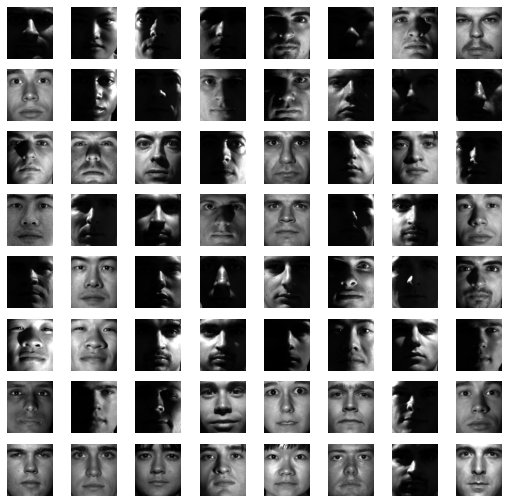

In [25]:
random_indices = np.random.permutation(all_faces.shape[1])
for counter in range(number_of_faces_per_person[0]):
    plt.subplot(8, 8, counter + 1)
    plt.imshow(all_faces[:, random_indices[counter]].reshape((168, 192)).T, cmap='gray')
    plt.axis('off') 
plt.tight_layout;

Next, we store all standardised face images of the first person in a data matrix *matrix*, the corresponding column-means in an array *means* and the column-standard-deviations in an array *stds*... 

In [41]:
matrix, mean, stds = standardise(all_faces)
# matrix, means, stds = standardise(all_faces[:,:number_of_faces_per_person[0]].astype('float64'))

...and visualise the faces via the following cell.

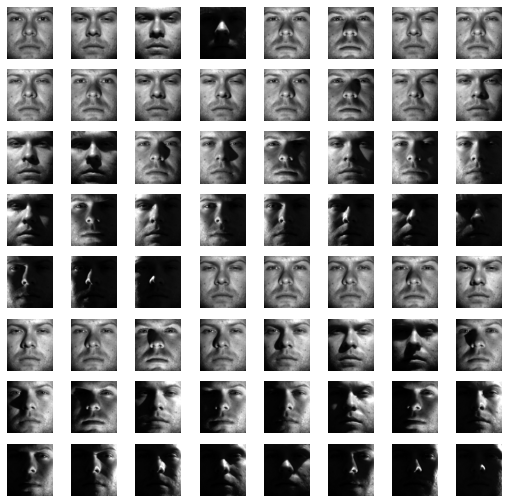

In [42]:
for counter in range(number_of_faces_per_person[0]):
    plt.subplot(8, 8, counter + 1)
    plt.imshow(matrix[:, counter].reshape((168, 192)).T, cmap='gray')
    plt.axis('off') 
plt.tight_layout;

For our first task we compute the best rank-*approximation_index* approximation *approximated_matrix* of *matrix* in the sense of the Frobenius norm. Experiment with different choices of *approximation_index* and visualise your results.

In [43]:
%%time
approximation_index = 29
approximated_matrix = svd_thresholding(matrix, approximation_index)

CPU times: user 1min 6s, sys: 1.96 s, total: 1min 8s
Wall time: 18.5 s


Test your result with the following hidden test for **approximation_index = 29**. A successful test is awarded **1/10** marks.

In [44]:
print("The error in Frobenius norm is {e}.".format(e = np.linalg.norm(approximated_matrix - matrix, 'fro')))

The error in Frobenius norm is 3325.8024264029054.


### Approximate image with eigenfaces

Write a function **approximate_with_svd_basis** that approximates an array *vector* with the basis of singular vectors *singular_vectors*. The function should return a vector of linear combinations of the singular vectors that best approximates the vector *vector*.

In [45]:
# The idea: a matrix X can be approximated using the left singular vectors
# as Uk Uk^T X
def approximate_with_svd_basis(vector, singular_vectors):
    approx = np.einsum("ij,kj,k...->i...", singular_vectors, singular_vectors, vector, optimize=True)
    return approx

Compute the (left) singular vectors of *matrix* and approximate the first face of the dataset with an increasing number of singular vectors and visualise your results.

CPU times: user 5min 46s, sys: 24.9 s, total: 6min 11s
Wall time: 1min 46s


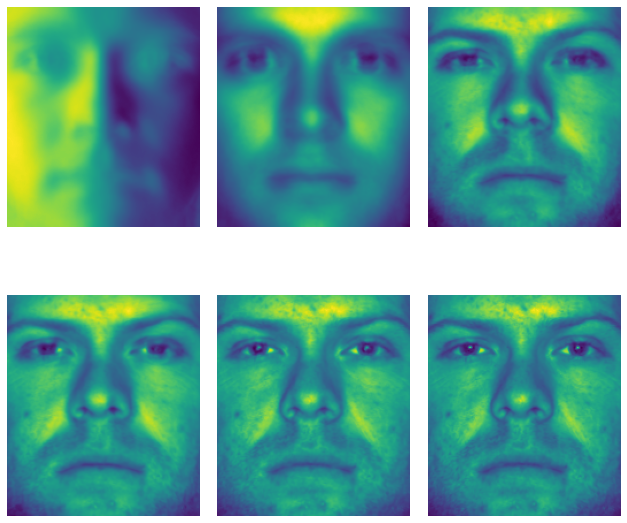

In [46]:
%%time
U, singular_values, V_transpose = scipy.linalg.svd(matrix)
k_values = [1, 10, 50, 100, 500, 1000]
target_img = matrix[:, 0]
fig, ax = plt.subplots(2, 3)
ax = ax.ravel()
for axi, k in zip(ax, k_values):
    left_k = U[:, :k]
    approx = approximate_with_svd_basis(target_img, left_k)
    axi.imshow(approx.reshape(168, 192).T)
    axi.axis("off")
plt.tight_layout()

Repeat the same exercise, but this time choose a face that is different to the faces that form your eigenfaces basis.

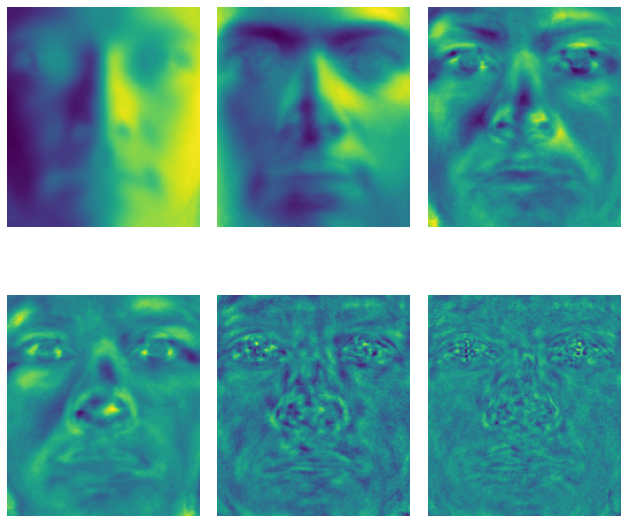

In [47]:
# Choosing a "gaussian-noise" face
# (every new sample yields a different eigenface)
k_values = [1, 10, 50, 100, 500, 1000]
np.random.seed(314)
target_img = np.random.randn(168 * 192)
fig, ax = plt.subplots(2, 3)
ax = ax.ravel()
for axi, k in zip(ax, k_values):
    left_k = U[:, :k]
    approx = approximate_with_svd_basis(target_img, left_k)
    axi.imshow(approx.reshape(168, 192).T)
    axi.axis("off")
plt.tight_layout()

## Sparse PCA

We conclude this coursework with an implementation of sparse PCA as introduced in the lecture note. We write two functions **soft_thresholding** and **sparse_pca**. The function **soft_thresholding** is implementing the soft-thresholding operation

$$ \left( \left(I + \gamma \partial \| \cdot \|_1 \right)^{-1}(z) \right)_j = \begin{cases} z_j - \gamma & z > \gamma \\ 0 & |z_j | \leq \gamma \\ z_j + \gamma & z_j < - \gamma \end{cases} \, . $$

Note that you can use your implementation from MTH786P. The function **sparse_pca** takes the arguments described in the function header and returns the solution of

\begin{align*}
    w^{k + 1} &= \arg\min_{w \in \mathbb{R}^n} \left\{ \alpha \| w \|_1 - \lambda^k \frac{\langle X^\top u^k, X^\top w\rangle}{\| X^\top w^k\|} + \frac{1}{2\tau} \| w - u^k \|^2 \right\} \, ,\label{eq:ipm-sparse-pca}\\
    u^{k + 1} &= \frac{w^{k + 1}}{\| w^{k + 1} \|_p} \, ,\\
    \lambda^{k + 1} &= \frac{\alpha \| u^{k + 1} \|_1}{\| X^\top u^{k + 1} \|} \, .
\end{align*}

after *maximum_no_of_iterations* iterations. Here, the step size parameter $\tau$ is named *step_size*, the balancing parameter $\alpha$ *regularisation_parameter* and the value $p$ for the $p$-norm is *p_norm*. The matrix $X$ is the mathematical notation for the variable *data_matrix*. Implement **sparse_pca** so that it returns the final singular vector and a list of singular values over the course of the iteration.

In [48]:
def soft_thresholding(argument, threshold):
    sign = -1 * (argument > threshold) + 1 * (argument < -threshold)
    return (np.abs(argument) > threshold) * (argument + sign * threshold)

def projected_norm(data_matrix, uk):
    pnorm = np.linalg.norm(np.einsum("ji,jk->ik", data_matrix, uk, optimize=True), ord=2)
    return pnorm
    
def sparse_pca(data_matrix, initial_vector, step_size=0.1, regularisation_parameter=1.635, p_norm=2,
               maximum_no_of_iterations=100, print_output=10):
    wk = initial_vector.copy()
    uk = wk / np.linalg.norm(wk, ord=p_norm)
    projected_norm_val = projected_norm(data_matrix, uk)
    λk = regularisation_parameter * np.linalg.norm(uk, ord=1) / projected_norm_val
    singular_values = [λk]
    for it in range(maximum_no_of_iterations):
        print(f"{it=} || {λk=:0.6f}", end="\n" if it % print_output == 0 else "\r")
        argument = np.einsum("ij,kj,kl->il", data_matrix, data_matrix, uk, optimize=True)
        argument = uk + step_size * λk * regularisation_parameter * argument / projected_norm_val
        wk = soft_thresholding(argument, regularisation_parameter * step_size)
        
        uk = wk / np.linalg.norm(wk, ord=p_norm)
        projected_norm_val = projected_norm(data_matrix, uk)
        λk = regularisation_parameter * np.linalg.norm(uk, ord=1) / projected_norm_val
        singular_values.append(λk)
    return uk, singular_values

We initialise a vector with normal distributed random numbers with mean zero and standard deviation one and normalise it with respect to the Euclidean norm.

In [49]:
np.random.seed(13)
p = 2
initial_vector = np.random.randn(matrix.shape[0], 1)
initial_vector = initial_vector / np.linalg.norm(initial_vector, p)

We compute a sparse singular vector for the data matrix *matrix*, the initial vector *initial_vector* and the value *p* for *p_norm*. Store the singular vector in a variable named *singular_vector* and the list of singular values in a variable named *singular_values*.

In [50]:
%%time
singular_vector, singular_values = sparse_pca(matrix, initial_vector, p_norm=p, maximum_no_of_iterations=100)

it=0 || λk=3.457320
it=10 || λk=0.040885
it=20 || λk=0.040882
it=30 || λk=0.040881
it=40 || λk=0.040881
it=50 || λk=0.040881
it=60 || λk=0.040881
it=70 || λk=0.040881
it=80 || λk=0.040881
it=90 || λk=0.040881
CPU times: user 30 s, sys: 1.35 s, total: 31.3 s
Wall time: 8.05 s


We visualise this singular vector and compare it to the first traditional singular vector with the following cell.

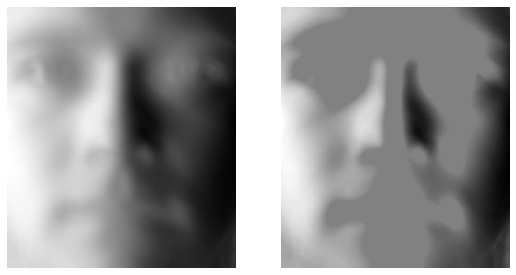

In [51]:
plt.subplot(1,2,1)
plt.imshow(U[:, 0].reshape((168, 192)).T, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(singular_vector.reshape((168, 192)).T, cmap='gray')
plt.axis('off');

We further plot the singular vectors and determine how many percent of entries are non-zero.

Around 59.19 % of coefficients are non-zero.


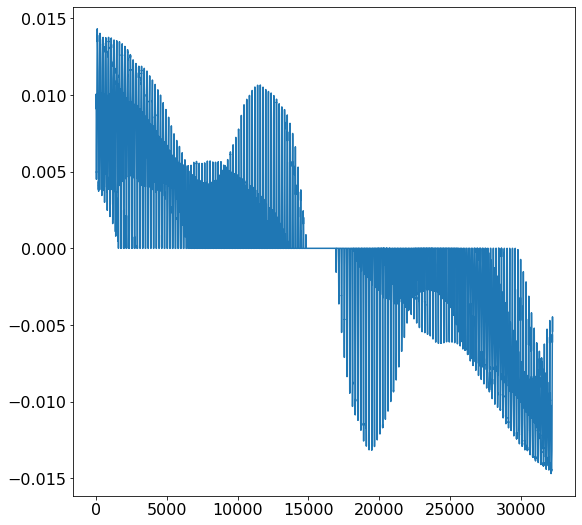

In [52]:
plt.plot(singular_vector)
print("Around {:.2f} % of coefficients are non-zero.".format(100*np.count_nonzero(singular_vector)/len( \
                                                                singular_vector)))

Test your code with the following two tests (one visible, one hidden); both tests are awarded one mark each, or **2/10 marks** in total.

In [53]:
p = 2
initial_test_vector = np.array([1, -1, 1, -1, 1]).astype(np.float64).reshape(-1, 1)
test_matrix = np.random.randint(-5, 5, size=(5, 10))
initial_test_vector = initial_test_vector / np.linalg.norm(initial_test_vector, p)
test_singular_vector, _ = sparse_pca(test_matrix, initial_test_vector, step_size=0.04, \
                                     regularisation_parameter=0.3, p_norm=p)
assert_array_almost_equal(test_singular_vector, np.array([[0.46303975], [-0.1367626], [0.4336254], [0], \
                                                          [0.76082797]]))

it=0 || λk=0.052129
it=10 || λk=0.051252
it=20 || λk=0.050167
it=30 || λk=0.048824
it=40 || λk=0.047163
it=50 || λk=0.045109
it=60 || λk=0.042563
it=70 || λk=0.040138
it=80 || λk=0.039412
it=90 || λk=0.038458


In [54]:
p = np.inf
initial_test_vector = np.array([-1, 1, 0, 1, -1, 0]).astype(np.float64).reshape(-1, 1)
test_matrix = np.random.randint(-5, 5, size=(6, 12))
initial_test_vector = initial_test_vector / np.linalg.norm(initial_test_vector, p)
test_singular_vector, _ = sparse_pca(test_matrix, initial_test_vector, step_size=0.04, \
                                     regularisation_parameter=0.2, p_norm=p)
assert_array_almost_equal(test_singular_vector, np.array([[-0.66158054], [0.45334313], [0], [0.71269342], \
                                                          [-1], [0]]))

it=0 || λk=0.052186
it=10 || λk=0.051435
it=20 || λk=0.050599
it=30 || λk=0.049669
it=40 || λk=0.048637
it=50 || λk=0.047492
it=60 || λk=0.046225
it=70 || λk=0.044827
it=80 || λk=0.043289
it=90 || λk=0.041602


In [55]:
test_singular_vector

array([[-0.66158054],
       [ 0.45334313],
       [ 0.        ],
       [ 0.71269342],
       [-1.        ],
       [ 0.        ]])